<a href="https://colab.research.google.com/github/majavarsava/End-To-End-NLP-analiza-TED-talkova/blob/main/End_to_end_NLP_analiza_TED_Talkova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End NLP analiza TED Talkova (Psihologija i međuljudski odnosi)

**Cilj projekta**  
Izgradnja kompletnog NLP pipelinea koji polazi od **audio zapisa** TED Talkova, preko **automatske transkripcije govora**, do višeslojne analize teksta: čišćenje, POS tagging, NER, ekstraktivno sažimanje, word embeddings i topic modeling.

**Fokus**  
TED predavanja iz područja psihologije i međuljudskih odnosa (ljubav, ranjivost, stres, depresija, sreća, odnosi, smisao života).  
Poseban naglasak na usporedbu **ASR transkripata** (Whisper) i službenih transkripata te utjecaj ASR grešaka na više razine obrade.

**Odabrani govori**  
15 tematski povezanih TED Talkova (vidi tablicu u nastavku).

**Korištene metode**  
- Automatsko prepoznavanje govora (Whisper)  
- Osnovna obrada teksta i POS tagging (spaCy)  
- Named Entity Recognition (spaCy)  
- Ekstraktivno sažimanje (TextRank)  
- Word embeddings (Word2Vec + GloVe finetuning)  
- Topic modeling (LDA + pyLDAvis vizualizacija)



**Napomena**  
TED službeno ne dozvoljava masovno skidanje videa, pa se koriste samo za istraživačke svrhe i u skladu s pravilima korištenja.

## 1. Dataset i odabir govora

U ovom projektu koristi se TED.com stranica, gdje se nalaze videozapisi TED Talkova zajedno sa službenim transkriptima, kako bi se odabrali i analizirali TED Talkovi iz područja psihologije i međuljudskih odnosa. Razlozi odabira tih tema su semantički bogati govori, puno emocija, osoba i pojmova što nam je idealno za NER, jasne teme te dovoljno dugi govori za ASR i sažimanje.


### **Izvor podataka**
Primarni dataset izvučen s https://www.ted.com/
- sadrži videozapise TED talkova i službene transkripte tih istih videozapisa


### **Konkretni govori koje ćemo uzeti:**
| Tema                         | Govor                                                                           | Video link                                                                                                                                                                                                                       |
| ---------------------------- | ------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Ljubav                       | *The brain in love* – Helen Fisher                                              | [https://www.ted.com/talks/helen_fisher_the_brain_in_love](https://www.ted.com/talks/helen_fisher_the_brain_in_love)                                                                                                             |
| Ranjiivost i odnosi          | *The power of vulnerability* – Brené Brown                                      | [https://www.ted.com/talks/brene_brown_the_power_of_vulnerability](https://www.ted.com/talks/brene_brown_the_power_of_vulnerability)                                                                                             |
| Sreća i smisao života        | *What makes a good life?* – Robert Waldinger                                    | [https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness](https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness)   |
| Privrženost i nevjera        | *Why we love, why we cheat* – Helen Fisher                                      | [https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat](https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat)                                                                                               |
| Emocije i sram               | *Listening to shame* – Brené Brown                                              | [https://www.ted.com/talks/brene_brown_listening_to_shame](https://www.ted.com/talks/brene_brown_listening_to_shame)                                                                                                             |
| Partnerski odnosi            | *The secret to desire in a long-term relationship* – Esther Perel               | [https://www.ted.com/talks/esther_perel_the_secret_to_desire_in_a_long_term_relationship](https://www.ted.com/talks/esther_perel_the_secret_to_desire_in_a_long_term_relationship)                                               |
| Psihologija stresa           | *How to make stress your friend* – Kelly McGonigal                              | [https://www.ted.com/talks/kelly_mcgonigal_how_to_make_stress_your_friend](https://www.ted.com/talks/kelly_mcgonigal_how_to_make_stress_your_friend)                                                                             |
| Mentalno zdravlje            | *Depression, the secret we share* – Andrew Solomon                              | [https://www.ted.com/talks/andrew_solomon_depression_the_secret_we_share](https://www.ted.com/talks/andrew_solomon_depression_the_secret_we_share)                                                                               |
| Emocionalna inteligencija    | *The surprising science of happiness* – Dan Gilbert                             | [https://www.ted.com/talks/dan_gilbert_the_surprising_science_of_happiness](https://www.ted.com/talks/dan_gilbert_the_surprising_science_of_happiness)                                                                           |
| Govor tijela i samopouzdanje | *Your body language may shape who you are* – Amy Cuddy                          | [https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are](https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are)                                                                     |
| Očekivanja u vezama          | *Your relationship expectations could be holding you back* – S. Yates-Anyabwile | [https://www.ted.com/talks/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back](https://www.ted.com/talks/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back) |
| Ljubav (definicija)          | *What is love?* – Brad Troeger                                                  | [https://www.ted.com/talks/brad_troeger_what_is_love](https://www.ted.com/talks/brad_troeger_what_is_love)                                                                                                                       |
| Prijateljstvo                | *Why friendship can be just as meaningful as romantic love* – Rhaina Cohen      | [https://www.ted.com/talks/rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love](https://www.ted.com/talks/rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love)                                                                                         |
| Smisao života                | *How to live a meaningful life* – Brian S. Lowery                               | [https://www.ted.com/talks/brian_s_lowery_how_to_live_a_meaningful_life](https://www.ted.com/talks/brian_s_lowery_how_to_live_a_meaningful_life)                                                                                 |
| Ljubav i hrabrost            | *To love is to be brave* – Kelly Corrigan                                       | [https://www.ted.com/talks/kelly_corrigan_to_love_is_to_be_brave](https://www.ted.com/talks/kelly_corrigan_to_love_is_to_be_brave)                                                                                               |


### **Kriteriji odabira:**
- tagovi: psychology, love, relationships, emotions, mental health
- trajanje 10-20min
- engleski jezik
- jasan govor

## 2. Priprema skupa podataka – odabir, skidanje videa, prebacivanje videa u WAV, priprema službenih transkripata

Odabiremo 15 relevantnih TED Talkova iz područja psihologije i međuljudskih odnosa te prikupljamo njihove linkove.

Linkove spremamo u .txt dokument koji koristimo kako bi odjednom preuzeli sve potrebne videozapise pomoću alata yp-dlp te ih spremamo u direktorij '/content/data/mp3/'.

Nakon što su sve .mp3 datoteke spremne konvertiramo ih u WAV fromat, pogodan za ASR obradu, pomoću alata pydub.


Dodajemo direktorije '/content/data/official_transcripts_not_cleaned' i '/content/data/official_transcripts'. U prvi manualno ubacujemo službene transkripte koje smo izvukli sa službene stranice (koji nam se nalaze na github repozitoriju). Službeni TED transkripti prikupljeni su ručno s TED web-stranice zbog nepostojanja stabilnog javnog API-ja za transkripte. Transkripti su pohranjeni kao obične tekstualne datoteke, provedeni su osnovni postupci normalizacije teksta te su datoteke spremljene unutar drugog direktorija.

Transkripte sa stranice koristimo kako bismo mogli evaluirati točnost transkripta koje ćemo dobiti iz videozapisa.

### Spremanje linkova i preuzimanje videozapisa - MP3

In [3]:
from pathlib import Path

out_path = Path("/content/sample_data/ted_urls.txt")

ted_urls = [
    "https://www.ted.com/talks/helen_fisher_the_brain_in_love",
    "https://www.ted.com/talks/brene_brown_the_power_of_vulnerability",
    "https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness",
    "https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat",
    "https://www.ted.com/talks/brene_brown_listening_to_shame",
    "https://www.ted.com/talks/esther_perel_the_secret_to_desire_in_a_long_term_relationship",
    "https://www.ted.com/talks/kelly_mcgonigal_how_to_make_stress_your_friend",
    "https://www.ted.com/talks/andrew_solomon_depression_the_secret_we_share",
    "https://www.ted.com/talks/dan_gilbert_the_surprising_science_of_happiness",
    "https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are",
    "https://www.ted.com/talks/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back",
    "https://www.ted.com/talks/brad_troeger_what_is_love",
    "https://www.ted.com/talks/rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love",
    "https://www.ted.com/talks/brian_s_lowery_how_to_live_a_meaningful_life",
    "https://www.ted.com/talks/kelly_corrigan_to_love_is_to_be_brave",
]

# ensure directory exists and write file
out_path.parent.mkdir(parents=True, exist_ok=True)
out_path.write_text("\n".join(ted_urls), encoding="utf-8")

print(f"Saved {len(ted_urls)} URLs to {out_path}")


Saved 15 URLs to /content/sample_data/ted_urls.txt


In [2]:
!mkdir -p /content/data/mp3

!pip install -U yt-dlp

!yt-dlp -x --audio-format mp3 \
-o "/content/data/mp3/%(webpage_url_basename)s.%(ext)s" \
-a /content/sample_data/ted_urls.txt

# ostavlja samo naziv koji piše nakon /talks/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 85.2 MB/s eta 0:00:00
[TedTalk] Extracting URL: https://www.ted.com/talks/helen_fisher_the_brain_in_love
[TedTalk] helen_fisher_the_brain_in_love: Downloading webpage
[TedTalk] 307: Downloading m3u8 information
[info] 307: Downloading 1 format(s): hls-audio0-medium
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 157
[download] Destination: /content/data/mp3/helen_fisher_the_brain_in_love.mp4
[download] 100% of   15.73MiB in 00:00:12 at 1.21MiB/s
[FixupM3u8] Fixing MPEG-TS in MP4 container of "/content/data/mp3/helen_fisher_the_brain_in_love.mp4"
[ExtractAudio] Destination: /content/data/mp3/helen_fisher_the_brain_in_love.mp3
Deleting original file /content/data/mp3/helen_fisher_the_brain_in_love.mp4 (pass -k to keep)
[TedTalk] Extracting URL: https://www.ted.com/talks/brene_brown_the_power_of_vulnerability
[TedTalk] brene_brown_the_p

In [ ]:
# if any errors uncomment these lines and add the link you need to download
# errors could occur on TED website servers side, servers experiencing high traffic or maintenance
# so sometimes we will have to run it again when the info is available

!yt-dlp -x --audio-format mp3 \
-o "/content/data/mp3/%(webpage_url_basename)s.%(ext)s" \
"https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat"


[TedTalk] Extracting URL: https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat
[TedTalk] helen_fisher_why_we_love_why_we_cheat: Downloading webpage
[TedTalk] 16: Downloading m3u8 information
[info] 16: Downloading 1 format(s): h264-1200k
[download] Destination: /content/data/mp3/helen_fisher_why_we_love_why_we_cheat.mp4
[download] 100% of  183.38MiB in 00:00:30 at 6.08MiB/s
[ExtractAudio] Destination: /content/data/mp3/helen_fisher_why_we_love_why_we_cheat.mp3
Deleting original file /content/data/mp3/helen_fisher_why_we_love_why_we_cheat.mp4 (pass -k to keep)


### Konverzija MP3 -> WAV

In [4]:
from pydub import AudioSegment
from pathlib import Path

DATA_DIR = Path("/content/data/mp3")
WAV_DIR = Path("/content/data/wav")
WAV_DIR.mkdir(parents=True, exist_ok=True)

for mp3_file in DATA_DIR.glob("*.mp3"):
  audio = AudioSegment.from_mp3(mp3_file)
  audio = audio.set_channels(1).set_frame_rate(16000) # Common sample rate for speech
  wav_path = WAV_DIR / (mp3_file.stem + ".wav")
  audio.export(wav_path, format="wav")

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


### Pregled podataka koje smo preuzeli

In [5]:
import pandas as pd

rows = []
for wav in WAV_DIR.glob("*.wav"):
  rows.append({
      "file": wav.name,
      "path": str(wav)
  })

df_audio = pd.DataFrame(rows)
df_audio

,file,path
0,brene_brown_the_power_of_vulnerability.wav,/content/data/wav/brene_brown_the_power_of_vul...
1,kelly_mcgonigal_how_to_make_stress_your_friend...,/content/data/wav/kelly_mcgonigal_how_to_make_...
2,brad_troeger_what_is_love.wav,/content/data/wav/brad_troeger_what_is_love.wav
3,dan_gilbert_the_surprising_science_of_happines...,/content/data/wav/dan_gilbert_the_surprising_s...
4,kelly_corrigan_to_love_is_to_be_brave.wav,/content/data/wav/kelly_corrigan_to_love_is_to...
5,stephanie_r_yates_anyabwile_your_relationship_...,/content/data/wav/stephanie_r_yates_anyabwile_...
6,robert_waldinger_what_makes_a_good_life_lesson...,/content/data/wav/robert_waldinger_what_makes_...
7,amy_cuddy_your_body_language_may_shape_who_you...,/content/data/wav/amy_cuddy_your_body_language...
8,brian_s_lowery_how_to_live_a_meaningful_life.wav,/content/data/wav/brian_s_lowery_how_to_live_a...
9,rhaina_cohen_why_friendship_can_be_just_as_mea...,/content/data/wav/rhaina_cohen_why_friendship_...


### Dodavanje službenih transkripata te čišćenje istih

In [6]:
from pathlib import Path

official_transcripts_not_cleaned_dir = Path("data/official_transcripts_not_cleaned")
official_transcripts_not_cleaned_dir.mkdir(parents=True, exist_ok=True)

# nakon pokretanja ovog koda će se napraviti direktorij za transkripte
# - trebamo ubaciti .txt fileove s repozitorija iz foldera "official_transcripts_not_cleaned"

official_transcripts_dir = Path("data/official_transcripts")
official_transcripts_dir.mkdir(parents=True, exist_ok=True)

In [7]:
import re
from pathlib import Path

def clean_ted_transcript(text: str) -> str:
    # micanje didaskalija
    text = re.sub(r"\[(Applause|Laughter|Music|Cheers|Video|Subtitle|Translation|.*)\]", "", text, flags=re.IGNORECASE)
    # micanje timestampova
    text = re.sub(r"\b\d{1,2}:\d{2}\b", "", text)
    # micanje interpunkcija (.,:!?;"'- etc.)
    text = re.sub(r"[.,:;!?\"\'\-()]", "", text)
    # brisanje praznih redova
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    # spajanje linija + razmak
    text = " ".join(lines)
    # višak razmaka normaliziranje
    text = re.sub(r"\s+", " ", text)

    text = text.lower()

    return text.strip()

source_dir = Path("/content/data/official_transcripts_not_cleaned")
target_dir = Path("/content/data/official_transcripts")
target_dir.mkdir(parents=True, exist_ok=True)

for file_path in source_dir.glob("*.txt"):
    target_path = target_dir / file_path.name

    if target_path.exists():
        print(f"Preskačem (već postoji): {file_path.name}")
        continue
    try:
      with open(file_path, "r", encoding="utf-8") as f:
          raw_text = f.read()

      clean_text = clean_ted_transcript(raw_text)

      with open(target_path, "w", encoding="utf-8") as f:
          f.write(clean_text)

      print(f"Očišćeno i spremljeno: {file_path.name}")

    except Exception as e:
      print(f"Greška prilikom obrade {file_path.name}: {e}")

print("Svi transkripti su očišćeni i spremljeni.")

Očišćeno i spremljeno: amy_cuddy_your_body_language_may_shape_who_you_are.txt
Očišćeno i spremljeno: helen_fisher_the_brain_in_love.txt
Očišćeno i spremljeno: robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness.txt
Očišćeno i spremljeno: dan_gilbert_the_surprising_science_of_happiness.txt
Očišćeno i spremljeno: andrew_solomon_depression_the_secret_we_share.txt
Očišćeno i spremljeno: stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back.txt
Očišćeno i spremljeno: helen_fisher_why_we_love_why_we_cheat.txt
Očišćeno i spremljeno: esther_perel_the_secret_to_desire_in_a_long_term_relationship.txt
Očišćeno i spremljeno: brad_troeger_what_is_love.txt
Očišćeno i spremljeno: rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love.txt
Očišćeno i spremljeno: brene_brown_the_power_of_vulnerability.txt
Očišćeno i spremljeno: brene_brown_listening_to_shame.txt
Očišćeno i spremljeno: brian_s_lowery_how_to_live_a_meaningful_l

## 3. ASR transkripcija - Whisper

Pretvaramo audiozapise TED Talkova u tekstualne transkripte koristeći Whisper (OpenAI). Na sličan način kao što smo čistili i službene transkripte ćemo očistiti i ove dobivene ASR metodom.

Nakon dobivenih transkripata ćemo evaluirati ASR transkripciju uspoređivanjem sa službenim transkriptima - WER (Word Error Rate), analiza grešaka, broj zamjena, umetaka i brisanja.

In [8]:
!pip install -q openai-whisper

import whisper
from pathlib import Path
import torch

wav_folder = Path("/content/data/wav")
output_folder = Path("/content/data/asr_transcripts")
output_folder.mkdir(parents=True, exist_ok=True)

# Check if GPU is available and set device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = whisper.load_model("base", device=device)

for wav_file in wav_folder.glob("*.wav"):
  print(f"Processing {wav_file.name}...")
  result = model.transcribe(str(wav_file))
  transcript_text = result["text"]

  # use wav_file.stem to get the correct filename for each audio file
  output_file = output_folder / f"{wav_file.stem}.txt"
  with open(output_file, "w", encoding="utf-8") as f:
    f.write(transcript_text)

  print(f"Saved transcription to {output_file}")

print(f"All audio files have been transcribed and saved.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using device: cuda


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 62.2MiB/s]


Processing brene_brown_the_power_of_vulnerability.wav...
Saved transcription to /content/data/asr_transcripts/brene_brown_the_power_of_vulnerability.txt
Processing kelly_mcgonigal_how_to_make_stress_your_friend.wav...
Saved transcription to /content/data/asr_transcripts/kelly_mcgonigal_how_to_make_stress_your_friend.txt
Processing brad_troeger_what_is_love.wav...
Saved transcription to /content/data/asr_transcripts/brad_troeger_what_is_love.txt
Processing dan_gilbert_the_surprising_science_of_happiness.wav...
Saved transcription to /content/data/asr_transcripts/dan_gilbert_the_surprising_science_of_happiness.txt
Processing kelly_corrigan_to_love_is_to_be_brave.wav...
Saved transcription to /content/data/asr_transcripts/kelly_corrigan_to_love_is_to_be_brave.txt
Processing stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back.wav...
Saved transcription to /content/data/asr_transcripts/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holdi

In [9]:
def clean_ted_transcript(text: str) -> str:
    # micanje timestampova
    text = re.sub(r"\b\d{1,2}:\d{2}\b", "", text)
    # micanje interpunkcija (.,:!?;"'- etc.)
    text = re.sub(r"[.,:;!?\"\'\-()]", "", text)
    # brisanje praznih redova
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    # spajanje linija + razmak
    text = " ".join(lines)
    # višak razmaka normaliziranje
    text = re.sub(r"\s+", " ", text)

    text = text.lower()

    return text.strip()

transcript_dir = Path("/content/data/asr_transcripts")

for file_path in transcript_dir.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()

    clean_text = clean_ted_transcript(raw_text)

    # prepisivanje iste datoteke s očišćenim tekstom
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(clean_text)

print("Svi Whisper transkripti su očišćeni i spremljeni.")

Svi Whisper transkripti su očišćeni i spremljeni.


In [10]:
!pip install jiwer

import jiwer
import pandas as pd
from pathlib import Path

whisper_dir = Path("/content/data/asr_transcripts")
official_dir = Path("/content/data/official_transcripts")
results = []
all_outputs = []

transformation = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemovePunctuation(),
    jiwer.Strip(),
    jiwer.RemoveMultipleSpaces()
])

for official_file in official_dir.glob("*.txt"):
    whisper_file = whisper_dir / official_file.name

    if not whisper_file.exists():
        print(f"Whisper transcript missing for {official_file.name}, skipping...")
        continue

    with open(official_file, "r", encoding="utf-8") as f:
        official_text = f.read()

    with open(whisper_file, "r", encoding="utf-8") as f:
        whisper_text = f.read()

    official_clean = transformation(official_text)
    whisper_clean = transformation(whisper_text)

    output = jiwer.process_words(official_clean, whisper_

    results.append({
        "File": official_file.name,
        "WER": output.wer,
        "Substitutions": output.substitutions,
        "Insertions": output.insertions,
        "Deletions": output.deletions
    })

    all_outputs.append(output)


# Pretvaranje u DataFrame
df_results = pd.DataFrame(results)

# Sortiranje po WER (najveći problemi na vrhu)
df_results = df_results.sort_values(by="WER", ascending=False).reset_index(drop=True)

print(df_results)

if not df_results.empty:
    avg_wer = df_results["WER"].mean()
    print(f"\nTotal files compared: {len(df_results)}")
    print(f"Average WER across all files: {avg_wer:.3f}")

if all_outputs:
    print("\nNajčešće greške u najgoroj datoteci:")
    worst_output = max(all_outputs, key=lambda o: o.wer)
    print(jiwer.visualize_error_counts(worst_output, top_k=10))


df_results.to_csv("/content/data/whisper_vs_official_wer.csv", index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.3 MB/s eta 0:00:00
                                                 File       WER  \
0   stephanie_r_yates_anyabwile_your_relationship_...  0.082283   
1           helen_fisher_why_we_love_why_we_cheat.txt  0.074194   
2   dan_gilbert_the_surprising_science_of_happines...  0.074084   
3                  helen_fisher_the_brain_in_love.txt  0.072097   
4    brian_s_lowery_how_to_live_a_meaningful_life.txt  0.071851   
5                  brene_brown_listening_to_shame.txt  0.063117   
6          brene_brown_the_power_of_vulnerability.txt  0.062195   
7   amy_cuddy_your_body_language_may_shape_who_you...  0.061640   
8   andrew_solomon_depression_the_secret_we_share.txt  0.049619   
9           kelly_corrigan_to_love_is_to_be_brave.txt  0.042608   
10  kelly_mcgonigal_how_to_make_stress_your_friend...  0.038194   
11  esther_perel_the_secret_to_desire_in_a_long_te...  0.038083   
12  rhaina_cohen_why_friendship_can_be_just_as_mea..

## 4. Ligvistička obrada i označavanje teksta

Nakon evaluacije kvalitete ASR transkripata, dobiveni tekst koristi se kao ulaz u standardni NLP pipeline. Cilj ove faze je analizirati lingvističku strukturu govora primjenom tokenizacije, lematizacije, označavanja vrsta riječi (POS tagging) te prepoznavanje imenovanih entiteta (NER). Alati korišteni za to su spaCy i NLTK.

Analizirana je raspodjela osnovnih gramatičkih kategorija (imenice, glagoli, pridjevi i prilozi) kako bi se dobio uvid u lingvističku strukturu govora i stil TED predavanja iz područja psihologije i međuljudskih odnosa.

### Tokenizacija, lematizacija, POS tagging te rezultati i vizualizacija

In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install wordcloud matplotlib seaborn -q

import spacy
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 139.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
# učitavanje svih ASR transkripata
TRANSCRIPT_DIR = Path("/content/data/asr_transcripts")

transcripts = {}

for file_path in TRANSCRIPT_DIR.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        transcripts[file_path.stem] = f.read()

In [13]:
# tokenizacija, lematizacija i POS tagging
def process_text_spacy(text):
    doc = nlp(text)

    tokens = []
    lemmas = []
    pos_tags = []

    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.text)
            lemmas.append(token.lemma_)
            pos_tags.append(token.pos_)

    return tokens, lemmas, pos_tags

In [14]:
# obrada cijelog korpusa
results = []

for talk_id, text in transcripts.items():
    tokens, lemmas, pos_tags = process_text_spacy(text)

    pos_counts = Counter(pos_tags)
    total_tokens = len(pos_tags)

    results.append({
        "talk_id": talk_id,
        "num_tokens": total_tokens,
        "num_types": len(set(lemmas)),
        "nouns": pos_counts.get("NOUN", 0) + pos_counts.get("PROPN", 0),
        "verbs": pos_counts.get("VERB", 0),
        "adjectives": pos_counts.get("ADJ", 0),
        "adverbs": pos_counts.get("ADV", 0),
    })

In [15]:
# tablica statistike
df_pos = pd.DataFrame(results)

# relativni udjeli
df_pos["noun_ratio"] = df_pos["nouns"] / df_pos["num_tokens"]
df_pos["verb_ratio"] = df_pos["verbs"] / df_pos["num_tokens"]
df_pos["adj_ratio"] = df_pos["adjectives"] / df_pos["num_tokens"]
df_pos["adv_ratio"] = df_pos["adverbs"] / df_pos["num_tokens"]

df_pos

# prosječna raspodjela vrsta riječi
mean_distribution = df_pos[
    ["noun_ratio", "verb_ratio", "adj_ratio", "adv_ratio"]
].mean()

mean_distribution

,0
noun_ratio,0.454007
verb_ratio,0.314329
adj_ratio,0.136149
adv_ratio,0.041640




Najčešće leme po POS kategoriji:
pos   lemma   
ADJ   good        75
      little      63
      bad         43
      romantic    39
      human       31
                  ..
VERB  get         61
      talk        58
X     b            1
      electro      1
      paradigm     1
Name: count, Length: 137, dtype: int64

Jednostavni Type-Token Ratio (TTR): 0.211



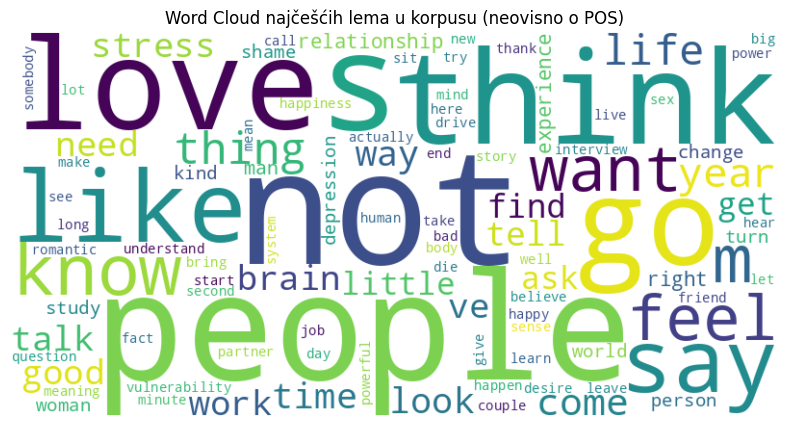


Prosječna duljina lema: 5.59 znakova


In [16]:
# najčešće riječi po POS kategoriji
all_lemmas = []
all_pos = []

for talk_id, text in transcripts.items():
    doc = nlp(text)
    for token in doc:
        if token.is_alpha and not token.is_stop:
            all_lemmas.append(token.lemma_)
            all_pos.append(token.pos_)

lemma_counter = Counter(all_lemmas)
top_lemmas = lemma_counter.most_common(50)

# najčešćih 15 po kategoriji
df_freq = pd.DataFrame({
    'lemma': all_lemmas,
    'pos': all_pos
})

top_by_pos = df_freq.groupby('pos')['lemma'].value_counts().groupby(level=0).head(15)

print("\n")
print("Najčešće leme po POS kategoriji:")
print(top_by_pos)

# leksička raznolikost - koliko je vokabular raznolik / ponavlja li se puno istih riječi
ttr = len(set(all_lemmas)) / len(all_lemmas) if all_lemmas else 0
print(f"\nJednostavni Type-Token Ratio (TTR): {ttr:.3f}\n")

# vizualizacija - word cloud sa svim lemama
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate_from_frequencies(lemma_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud najčešćih lema u korpusu (neovisno o POS)')
plt.show()

# prosječna duljina lema (u znakovima) – za uvid u složenost riječi
avg_length = sum(len(lemma) for lemma in all_lemmas) / len(all_lemmas) if all_lemmas else 0
print(f"\nProsječna duljina lema: {avg_length:.2f} znakova")

### Named Entity Recognition i vizualizacija


In [17]:
ner_results = {}

for talk, text in transcripts.items():
    doc = nlp(text)

    entities = [
        (ent.text, ent.label_)
        for ent in doc.ents
    ]

    ner_results[talk] = entities

ner_results[list(ner_results.keys())[0]][:15] #primjer pregleda za jedan govor

# filtriranje po tipu entiteta
TARGET_ENTITIES = {
    "PERSON",
    "ORG",
    "GPE",
    "LOC",
    "EVENT",
    "WORK_OF_ART"
}

filtered_ner = {}

for talk, entities in ner_results.items():
    filtered_ner[talk] = [
        (text, label)
        for text, label in entities
        if label in TARGET_ENTITIES
    ]

# statistika entiteta po govoru
ner_stats = []

for talk, entities in filtered_ner.items():
    labels = [label for _, label in entities]
    counts = Counter(labels)

    ner_stats.append({
        "talk": talk,
        "PERSON": counts.get("PERSON", 0),
        "ORG": counts.get("ORG", 0),
        "GPE": counts.get("GPE", 0),
        "LOC": counts.get("LOC", 0),
        "EVENT": counts.get("EVENT", 0),
        "WORK_OF_ART": counts.get("WORK_OF_ART", 0),
        "TOTAL_ENTITIES": len(entities)
    })

ner_df = pd.DataFrame(ner_stats)
ner_df

# najčešći entiteti u cijelom korpusu
all_entities = []

for entities in filtered_ner.values():
    all_entities.extend(entities)

entity_counter = Counter(all_entities)

entity_counter.most_common(20)


[(('the united states', 'GPE'), 8),
 (('america', 'GPE'), 5),
 (('new york', 'GPE'), 4),
 (('harvard', 'ORG'), 4),
 (('aaron', 'PERSON'), 3),
 (('jim', 'PERSON'), 3),
 (('paris', 'GPE'), 3),
 (('joe', 'PERSON'), 3),
 (('manila', 'GPE'), 3),
 (('lucy brown', 'PERSON'), 2),
 (('boston', 'GPE'), 2),
 (('thomas', 'PERSON'), 2),
 (('the new york times', 'ORG'), 2),
 (('doc', 'ORG'), 2),
 (('china', 'GPE'), 2),
 (('africa', 'LOC'), 2),
 (('john', 'PERSON'), 2),
 (('hannah', 'PERSON'), 2),
 (('leonardo davenci', 'PERSON'), 2),
 (('stanford', 'ORG'), 2)]

In [18]:
# ukupna statistika po tipu entiteta
total_counts = ner_df[['PERSON', 'ORG', 'GPE', 'LOC', 'EVENT', 'WORK_OF_ART']].sum()
print("Ukupno po tipu entiteta:\n", total_counts)
print("\nNajčešći tip:", total_counts.idxmax(), f"({total_counts.max()} pojavljivanja)")

Ukupno po tipu entiteta:
 PERSON         47
ORG            32
GPE            52
LOC             3
EVENT           1
WORK_OF_ART     0
dtype: int64

Najčešći tip: GPE (52 pojavljivanja)


/tmp/ipython-input-2303466635.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette="viridis")


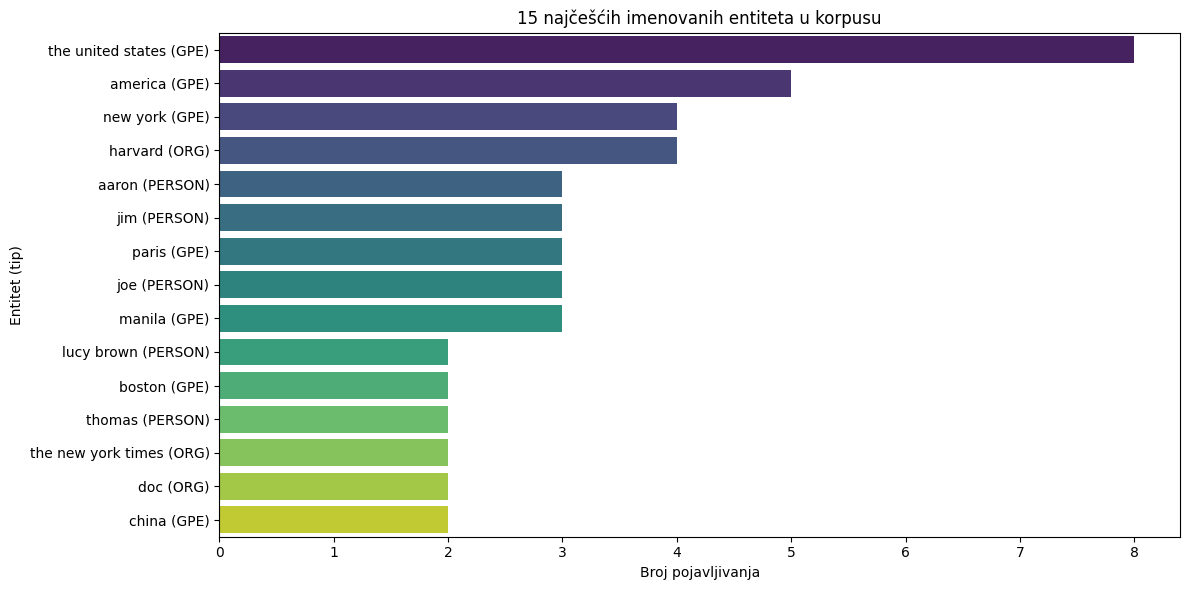

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top_entities = entity_counter.most_common(15)
labels = [f"{ent[0]} ({ent[1]})" for ent, count in top_entities]
counts = [count for ent, count in top_entities]

plt.figure(figsize=(12,6))
sns.barplot(x=counts, y=labels, palette="viridis")
plt.title("15 najčešćih imenovanih entiteta u korpusu")
plt.xlabel("Broj pojavljivanja")
plt.ylabel("Entitet (tip)")
plt.tight_layout()
plt.show()

## 5.  Ekstraktivno sažimanje teksta (TextRank)

Ekstraktivno sažimanje primjenom algoritma TextRank koristi se za izdvajanje najinformativnijih rečenica iz transkripata TED Talkova.

Cilj je smanjiti šum prisutan u ASR transkriptima i dobiti sažetke koji zadržavaju ključne semantičke informacije govora, što omogućuje daljnju analizu tema i usporedbu sadržaja među govorima.

In [20]:
!pip install nltk spacy -q
!python -m spacy download en_core_web_sm -q
!pip install nltk -q

import spacy
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path
from collections import defaultdict
import re

nltk.download('punkt')
nltk.download('punkt_tab')
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    # ako model nije loadan, ponovno downloadaj
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("sentencizer")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 144.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
def get_sentences(text):
    # prvo očisti šum
    text = re.sub(r'\[.*?\]', '', text)  # ukloni [Laughter], [Applause] itd.
    text = re.sub(r'\s+', ' ', text).strip()  # normaliziraj razmake

    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

    cleaned = []
    for s in sentences:
        if len(s) > 350:  # ako je predugačka (>350 znakova) → ručno podijeli na manje chunkove
            words = s.split()
            for i in range(0, len(words), 30):  # max 30 riječi po chunku
                chunk = ' '.join(words[i:i+30])
                if len(chunk) > 20:  # preskoči prekratke
                    cleaned.append(chunk)
        elif 20 < len(s) < 350:
            cleaned.append(s)

    return cleaned if cleaned else [text]

In [22]:
def textrank_summarize(text, ratio=0.20, min_sentences=4, max_sentences=8, damping=0.85, max_iter=100):
    sentences = get_sentences(text)
    if len(sentences) == 0:
        print("Upozorenje: Nema detektiranih rečenica!")
        return []
    if len(sentences) < 15:
        ratio = 0.35

    if len(sentences) <= min_sentences:
        return sentences

    # TF-IDF
    vectorizer = TfidfVectorizer(stop_words="english", smooth_idf=True, min_df=2)
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # kosinusna sličnost
    sim_matrix = cosine_similarity(tfidf_matrix)
    np.fill_diagonal(sim_matrix, 0)

    # normalizacija u prijelaznu matricu
    row_sums = sim_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # izbjegni dijeljenje s nulom
    transition_matrix = sim_matrix / row_sums

    # PageRank
    n = len(sentences)
    scores = np.ones(n) / n
    for _ in range(max_iter):
        scores = (1 - damping) / n + damping * transition_matrix.T.dot(scores)

    # odabir top rečenica
    target_count = max(min_sentences, min(max_sentences, int(len(sentences) * ratio)))
    top_indices = np.argsort(-scores)[:target_count]
    top_indices = sorted(top_indices)  # očuvaj približan redoslijed

    return [sentences[i] for i in top_indices]

In [23]:
# obrada svih transkripata
ASR_DIR = Path("/content/data/asr_transcripts")
summaries = {}

for file_path in ASR_DIR.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read().strip()

    talk_id = file_path.stem
    summary_sentences = textrank_summarize(text, ratio=0.18)  # ~18% duljine

    summaries[talk_id] = {
        "original_sentences": len(get_sentences(text)),
        "summary_sentences": len(summary_sentences),
        "summary": summary_sentences
    }

    print(f"\n")
    print(f"{talk_id.upper()}")
    print(f"Original: {summaries[talk_id]['original_sentences']} rečenica")
    print(f"Sažetak:  {summaries[talk_id]['summary_sentences']} rečenica")
    print("SAŽETAK:")
    for i, s in enumerate(summary_sentences, 1):
        print(f"{i}. {s}")
    print()



AMY_CUDDY_YOUR_BODY_LANGUAGE_MAY_SHAPE_WHO_YOU_ARE
Original: 139 rečenica
Sažetak:  8 rečenica
SAŽETAK:
1. so i want to start by offering you a free notech life hack and all it requires of you is this that you change your posture for two minutes but before i give it away i want to ask you to right now do a little audit of your body and what youre doing with your body
2. so i want you to pay attention to what youre doing right now were going to come back to that in a few minutes
3. want you to stand like this and its going to make you feel more powerful so this is what we did we decided to bring people into the lab and
4. so this is what happens they come in they spit into a vial for two minutes say you need to do this or this they dont look at pictures of the poses we dont want to prime them with a concept of power we want them to be feeling power so two minutes they do this we then ask them how powerful do you feel on a series of items
5. so i said fake it till you make it its not m

## 6. Word Embeddings (Word2Vec + GloVe finetuning)

Word2Vec model treniran je nad ASR transkriptima TED Talkova kako bi se dobila vektorska reprezentacija riječi temeljena na kontekstu. Time je omogućena analiza semantičke sličnosti ključnih pojmova vezanih uz ljubav, odnose i psihološke procese.

**Pristup**
- početni Word2Vec treniran na korpusu (15 govora)
- **finetuning** pretreniranog GloVe modela kako bi se prevladala ograničenost malog korpusa
- analiza najsličnijih riječi za ključne pojmove
- vizualizacija sličnosti pomoću **t-SNE**

In [24]:
!pip install gensim -q

import gensim.downloader as api
from gensim.models import Word2Vec
import plotly.express as px
from sklearn.manifold import TSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 88.6 MB/s eta 0:00:00


In [25]:
glove_model = api.load("glove-wiki-gigaword-100")

def preprocess_for_embeddings(text):
    doc = nlp(text)
    return [
        token.lemma_
        for token in doc
        if token.is_alpha and not token.is_stop
    ]

documents = []

for file_path in ASR_DIR.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    tokens = preprocess_for_embeddings(text)
    documents.append(tokens)

print("Broj dokumenata:", len(documents))
print("Primjer tokena:", documents[0][:20])

w2v_model = Word2Vec(
    sentences=documents,
    vector_size=100,
    window=5,
    min_count=3,
    workers=4
)

for word in glove_model.key_to_index:
    if word in w2v_model.wv:
        w2v_model.wv[word] = glove_model[word]

key_terms = ['love', 'stress', 'happiness', 'relationship', 'vulnerability', 'depression', 'friendship']

for term in key_terms:
    if term in w2v_model.wv:
        print(f"\nSličnosti za '{term}':")
        print(w2v_model.wv.most_similar(term, topn=10))
    else:
        print(f"\n'{term}' nije u modelu.")

[==================================================] 100.0% 128.1/128.1MB downloaded
Broj dokumenata: 15
Primjer tokena: ['want', 'start', 'offer', 'free', 'notech', 'life', 'hack', 'require', 'change', 'posture', 'minute', 'away', 'want', 'ask', 'right', 'little', 'audit', 'body', 'body', 'sort']

Sličnosti za 'love':
[('life', 0.7287957668304443), ('dream', 0.7267670035362244), ('wonder', 0.70945805311203), ('mind', 0.7063044905662537), ('true', 0.7032780647277832), ('feel', 0.6982081532478333), ('happy', 0.6980456113815308), ('kind', 0.6957338452339172), ('soul', 0.6952476501464844), ('good', 0.6919699907302856)]

Sličnosti za 'stress':
[('pain', 0.725872278213501), ('anxiety', 0.7095138430595398), ('psychological', 0.6904554963111877), ('physical', 0.6795199513435364), ('risk', 0.6541153788566589), ('discomfort', 0.6437202095985413), ('pressure', 0.6311295628547668), ('trauma', 0.6310915946960449), ('disorder', 0.6305811405181885), ('illness', 0.6275010704994202)]

Sličnosti za 'ha

### Vizualizacija:

In [26]:
!pip install plotly scikit-learn -q


In [27]:
key_terms = ['love', 'stress', 'happiness', 'relationship', 'vulnerability', 'depression', 'friendship']
all_words = set(key_terms)

for term in key_terms:
    if term in w2v_model.wv:
        similar = [sim[0] for sim in w2v_model.wv.most_similar(term, topn=10)]
        all_words.update(similar)

all_words = list(all_words)

# uzmi vektore
vectors = np.array([w2v_model.wv[word] for word in all_words])

# t-SNE na 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(vectors)

# DataFrame za Plotly
df_vis = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'word': all_words
})

# Interaktivni scatter
fig = px.scatter(df_vis, x='x', y='y', text='word',
                 title='t-SNE vizualizacija semantičkih sličnosti (Word2Vec + GloVe)',
                 hover_data={'word': True},
                 size_max=60)

fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

## 7. Topic modeling (LDA - Latent Dirichlet Allocation)

Topic modeling proveden je primjenom LDA modela nad ASR transkriptima, pri čemu je svaki TED Talk tretiran kao jedan dokument. Dobivene teme odgovaraju dominantnim psihološkim i emocionalnim motivima govora, poput ljubavi, odnosa, stresa i smisla života.

Vizualizirali smo podatke pomoću **pyLDAvis** interaktivnom mapom tema i **heatmapom** distribucije po govoru. Dobili smo jasno definirane teme te pregled toga koja tema dominira u kojem govoru.

In [32]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="datetime.datetime.utcnow()")
warnings.filterwarnings("ignore", category=FutureWarning)

In [33]:
!pip install pyLDAvis -q

import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

dictionary = Dictionary(documents)

# filtriranje rijetkih i prečestih riječi
dictionary.filter_extremes(no_below=2, no_above=0.5)

corpus = [dictionary.doc2bow(doc) for doc in documents]

print("Broj riječi u rječniku:", len(dictionary))


Broj riječi u rječniku: 1080


In [34]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10
)

topics = lda_model.print_topics(num_words=8)

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, '/content/lda_visualization.html')

topics = lda_model.print_topics(num_words=12)
print("Dobivene teme (top 12 riječi po temi):")
for idx, topic in topics:
    print(f"Tema {idx}: {topic}")

talk_names = [f.stem for f in ASR_DIR.glob("*.txt")]

for i, bow in enumerate(corpus):
    dist = {f"Tema {t[0]}": round(t[1], 3) for t in lda_model.get_document_topics(bow)}
    dist['Govor'] = talk_names[i]



Dobivene teme (top 12 riječi po temi):
Tema 0: 0.013*"happiness" + 0.013*"power" + 0.013*"desire" + 0.008*"body" + 0.008*"powerful" + 0.007*"meaning" + 0.007*"achievement" + 0.007*"picture" + 0.007*"sex" + 0.007*"personal" + 0.006*"student" + 0.006*"high"
Tema 1: 0.036*"depression" + 0.010*"treatment" + 0.010*"romantic" + 0.007*"region" + 0.007*"month" + 0.007*"medication" + 0.006*"begin" + 0.006*"sad" + 0.005*"system" + 0.005*"intense" + 0.005*"activity" + 0.005*"later"
Tema 2: 0.013*"brave" + 0.011*"bravery" + 0.010*"mom" + 0.008*"care" + 0.008*"recognize" + 0.007*"romantic" + 0.006*"husband" + 0.006*"joy" + 0.006*"read" + 0.006*"speak" + 0.006*"office" + 0.006*"dream"
Tema 3: 0.065*"stress" + 0.034*"shame" + 0.024*"vulnerability" + 0.016*"response" + 0.013*"heart" + 0.010*"oxytocin" + 0.009*"ted" + 0.008*"yeah" + 0.007*"walk" + 0.007*"hormone" + 0.007*"vulnerable" + 0.007*"yes"
Tema 4: 0.014*"romantic" + 0.011*"vulnerability" + 0.011*"sex" + 0.010*"okay" + 0.010*"move" + 0.010*"some

**Interpretacija tema koje smo znali dobiti:**

Romantična ljubav i kemija mozga

Depresija, sram i ranjivost

tres, želja i emocionalna povezanost

Moć tijela i samopouzdanje

Smisao života i osobni rast

           0  govor         1         4         2         3
0   0.998571      0  0.000000  0.000000  0.000000  0.000000
1   0.000000      1  0.998256  0.000000  0.000000  0.000000
2   0.996736      2  0.000000  0.000000  0.000000  0.000000
3   0.998609      3  0.000000  0.000000  0.000000  0.000000
4   0.000000      4  0.998857  0.000000  0.000000  0.000000
5   0.000000      5  0.000000  0.996016  0.000000  0.000000
6   0.000000      6  0.000000  0.998762  0.000000  0.000000
7   0.998121      7  0.000000  0.000000  0.000000  0.000000
8   0.994371      8  0.000000  0.000000  0.000000  0.000000
9   0.000000      9  0.000000  0.000000  0.995411  0.000000
10  0.000000     10  0.000000  0.998194  0.000000  0.000000
11  0.000000     11  0.000000  0.000000  0.000000  0.998139
12  0.997567     12  0.000000  0.000000  0.000000  0.000000
13  0.000000     13  0.000000  0.000000  0.996795  0.000000
14  0.000000     14  0.000000  0.000000  0.000000  0.998207


<Axes: ylabel='govor'>

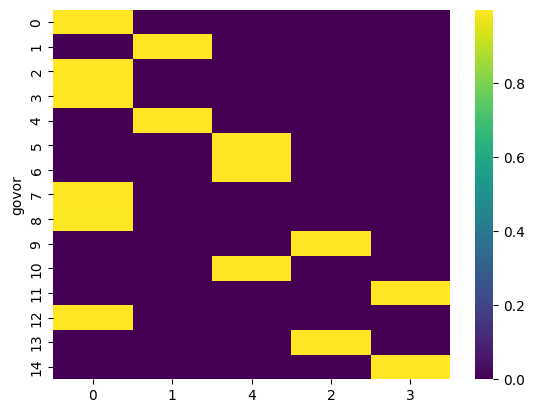

In [35]:
topic_distributions = []
for i, bow in enumerate(corpus):
    topics = lda_model.get_document_topics(bow)
    dist = {t[0]: t[1] for t in topics}
    dist['govor'] = i
    topic_distributions.append(dist)

df_topics = pd.DataFrame(topic_distributions).fillna(0)
print(df_topics)

sns.heatmap(df_topics.set_index('govor'), cmap='viridis')

## Zaključak i budući koraci

Projekt je uspješno demonstrirao **end-to-end NLP pipeline** za analizu govorenog sadržaja TED Talkova iz područja psihologije i međuljudskih odnosa. Počevši od audio zapisa, preko automatske transkripcije (Whisper), lingvističke obrade (POS tagging, NER), ekstraktivnog sažimanja (TextRank), word embeddingsa (finetuning GloVe-a) pa do topic modelinga (LDA), dobiveni su **smisleni i interpretabilni rezultati** koji jasno odražavaju glavne teme govora.

**Ključni nalazi**  
- ASR transkripcija (Whisper) pokazala je **prosječni WER od 5,7%** (raspon 2,0%–13,6%), što je vrlo dobra točnost za spontani govor TED predavanja.  
- Najčešće greške su supstitucije (npr. "ok" → "okay"), insertions/deletions manjih riječi i povremeno propuštanje markera ([laughter], [applause]).  
- Unatoč tim greškama, više razine obrade (embeddings i topic modeling) ostale su **stabilne i semantički smislene** – dominantne teme (romantična ljubav, stres i povezanost, depresija i ranjivost, moć tijela, smisao života) jasno su izvučene i odgovaraju stvarnim sadržajima govora.

**Najvažniji rezultati**  
- **Word embeddings** (GloVe finetuning) pokazali su očekivane semantičke veze (npr. "love" blizu "life", "dream", "feel"; "relationship" blizu "friendship", "marriage").  
- **LDA** (5 tema) odlično je razdvojio korpus:  
  - Tema 1: Romantična ljubav i kemija mozga  
  - Tema 2: Depresija, sram i ranjivost  
  - Tema 3: Stres, želja i emocionalna povezanost  
  - Tema 4: Moć tijela i samopouzdanje  
  - Tema 5: Smisao života i osobni rast  
- Većina govora ima **jednu dominantnu temu** (>95%), što potvrđuje tematsku fokusiranost TED predavanja.

**Ograničenja projekta**  
- Korpus je relativno mali (15 govora), što utječe na stabilnost Word2Vec treninga od nule.  
- Nije provedena detaljna usporedba ASR vs. official transkripata (npr. WER po razini, utjecaj na embeddings/LDA) – ovo je svjestan izbor zbog vremenskih ograničenja, ali predstavlja najvažniji sljedeći korak.

**Budući koraci i nadogradnje**  
- Proširiti korpus na 50+ govora za robusnije embeddings i teme.  
- Provesti punu usporedbu ASR vs. official (WER, ROUGE za sažetke, cosine similarity embeddingsa).  
- Dodati generativno sažimanje (npr. Grok, Llama ili BART) i usporediti s ekstraktivnim.  
- Primijeniti BERT-based embeddings (npr. Sentence-BERT) za finiju semantičku analizu.  
- Provesti sentiment analizu po rečenicama i povezati s temama.

**Zaključna misao**  
Unatoč ograničenjima malog korpusa i prisutnosti ASR grešaka, pipeline je pokazao visoku robusnost – ključne teme i semantičke veze jasno su detektirane. Ovo potvrđuje da **moderne NLP metode mogu uspješno analizirati govoreni sadržaj čak i s nesavršenim transkriptima**, što otvara vrata široj primjeni na spontani govor u psihologiji, edukaciji i mentalnom zdravlju.